数据来源：http://fund.eastmoney.com/519674.html?spm=001.rwb

天天基金官网：银河创新成长混合519674

In [1]:
import pandas as pd
import datetime

In [2]:
df = pd.read_csv('大成沪深300指数A-519300.txt', sep='\t', header=None, names=['x', 'y', 'equityReturn'])
df.head()

,x,y,equityReturn
0,2006-04-06 00:00:00,1.0000,0.0000
1,2006-04-10 00:00:00,1.0004,0.0400
2,2006-04-17 00:00:00,1.0010,0.0600
3,2006-04-21 00:00:00,1.0124,1.1389
4,2006-04-24 00:00:00,1.0098,-0.2568


In [3]:
df.info() # 2010-12-29 to 2020-05-13 的数据 2260条

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441 entries, 0 to 3440
Data columns (total 3 columns):
x               3441 non-null object
y               3441 non-null float64
equityReturn    3441 non-null float64
dtypes: float64(2), object(1)
memory usage: 80.8+ KB


In [4]:
df.describe()

,y,equityReturn
count,3441.000000,3441.000000
mean,1.014348,0.046799
std,0.276316,1.658771
min,0.550400,-8.556200
25%,0.811500,-0.658400
50%,0.982800,0.075600
75%,1.110200,0.833500
max,2.343900,9.214000


In [5]:
df[(df.x >= "2020-01-01") & (df.x <= "2020-05-05")]

,x,y,equityReturn
3355,2020-01-02 00:00:00,1.1273,1.3577
3356,2020-01-03 00:00:00,1.1258,-0.1331
3357,2020-01-06 00:00:00,1.1227,-0.2754
3358,2020-01-07 00:00:00,1.1306,0.7037
3359,2020-01-08 00:00:00,1.1173,-1.1764
...,...,...,...
3429,2020-04-24 00:00:00,0.9938,-0.8085
3430,2020-04-27 00:00:00,0.9998,0.6037
3431,2020-04-28 00:00:00,1.0059,0.6101
3432,2020-04-29 00:00:00,1.0101,0.4175


In [6]:
df.index = df['x']  # 建立索引
df.head()

,x,y,equityReturn
x,,,
2006-04-06 00:00:00,2006-04-06 00:00:00,1.0000,0.0000
2006-04-10 00:00:00,2006-04-10 00:00:00,1.0004,0.0400
2006-04-17 00:00:00,2006-04-17 00:00:00,1.0010,0.0600
2006-04-21 00:00:00,2006-04-21 00:00:00,1.0124,1.1389
2006-04-24 00:00:00,2006-04-24 00:00:00,1.0098,-0.2568


In [7]:
df.index = pd.to_datetime(df.x)     # 使用x时间列为索引列，定位快
df = df.drop(['x'], axis=1)  # 删除x列
df.head()

,y,equityReturn
x,,
2006-04-06,1.0000,0.0000
2006-04-10,1.0004,0.0400
2006-04-17,1.0010,0.0600
2006-04-21,1.0124,1.1389
2006-04-24,1.0098,-0.2568


In [8]:
df.groupby(df.index.month)['y'].mean()

x
1     1.072188
2     1.030492
3     1.054922
4     1.018395
5     0.996439
6     0.999199
7     0.983532
8     0.986750
9     0.985951
10    0.996631
11    1.013945
12    1.036963
Name: y, dtype: float64

#### 大成沪深300指数A-519300走势图:


<img src="大成沪深300指数A-519300.png" width="400px" align="left">

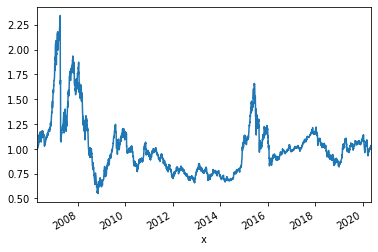

In [9]:
df['y'].plot() # 根据数据绘制走势图

<img scr="走势图.png">

In [10]:
res = []

# 先按年分组，再按月分组
for indexs, groupby_year_month in df.groupby([df.index.year, df.index.month]):
    _ =  list(groupby_year_month['y'].values)  # 各个月份的y值列表
#     print(groupby_year_month)
    
    # 寻找最大回撤率
    _min = 1  # 最低点索引
    _max = 0  # 最高点索引
    for i, y in enumerate(_):
        if y < _[_min]:
            _min = i
        if y > _[_max]:
            _max = i
    
    # 如果最低点的索引大于最高点的索引，找到最大撤回率
    if _min > _max:
        pass
#         print(True)
    # 否则，重新寻找最低点前的最高点
    else:
        _max = 0 
        for i in range(_min):
            if(_[i] > _[_max]):
                _max = i
    
    t = [groupby_year_month.index[0], _[_max], _[_min], _[_max] - _[_min], (_[_max] - _[_min]) / _[_max] * 100]
    res.append(t)
            

result = pd.DataFrame(res, columns=["date", "max", "min", "diff", "rate"])
result

,date,max,min,diff,rate
0,2006-04-06,1.0000,1.0000,0.0000,0.000000
1,2006-05-08,1.0465,1.0465,0.0000,0.000000
2,2006-06-01,1.1711,1.0689,0.1022,8.726838
3,2006-07-03,1.1825,1.0826,0.0999,8.448203
4,2006-08-01,1.0724,1.0263,0.0461,4.298769
...,...,...,...,...,...
165,2020-01-02,1.1424,1.0400,0.1024,8.963585
166,2020-02-03,0.9618,0.9618,0.0000,0.000000
167,2020-03-02,1.0909,0.9295,0.1614,14.795123
168,2020-04-01,0.9640,0.9640,0.0000,0.000000


In [11]:
result.describe()

,max,min,diff,rate
count,170.000000,170.000000,170.000000,170.000000
mean,1.025274,0.960642,0.064632,5.532072
std,0.288432,0.243239,0.118642,6.805167
min,0.558900,0.550400,0.000000,0.000000
25%,0.819800,0.775475,0.006275,0.735055
50%,0.983550,0.942900,0.039200,4.018546
75%,1.122200,1.046650,0.072700,7.497987
max,2.343900,2.002300,1.274600,54.379453


In [23]:
result["rate"].max()

54.37945304833824

In [24]:
result["rate"].mean()

5.532071657062703

In [14]:
# result['date'] = result['date'].apply(lambda x : x + pd.tseries.offsets.DateOffset(days=1-x.day)) # 获取当月首日
result['date'] = result['date'].apply(lambda x : datetime.datetime.strftime(x, "%Y-%m")) # 只保留年月

In [15]:
# 日期列转为索引
result.index = pd.to_datetime(result['date'])
result = result.drop(['date'], axis=1)
result

,max,min,diff,rate
date,,,,
2006-04-01,1.0000,1.0000,0.0000,0.000000
2006-05-01,1.0465,1.0465,0.0000,0.000000
2006-06-01,1.1711,1.0689,0.1022,8.726838
2006-07-01,1.1825,1.0826,0.0999,8.448203
2006-08-01,1.0724,1.0263,0.0461,4.298769
...,...,...,...,...
2020-01-01,1.1424,1.0400,0.1024,8.963585
2020-02-01,0.9618,0.9618,0.0000,0.000000
2020-03-01,1.0909,0.9295,0.1614,14.795123


<IPython.core.display.Javascript object>

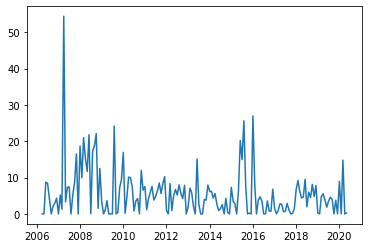

In [16]:
plt.plot(result.index, result['rate'])

In [17]:
# 近两年
today = datetime.date.today()
two_year_ago = datetime.datetime(today.year - 2, today.month - 1, today.day)
crisis_start = datetime.datetime(2007, 1, 1)
crisis_end = datetime.datetime(2009, 1, 1)

In [18]:
datetime.datetime.strftime(crisis_end, "%Y-%m")

'2009-01'

In [19]:
datetime.datetime.strftime(two_year_ago, "%Y-%m")

'2018-04'

In [20]:
near_two_year_df = result[(result.index >= two_year_ago)]
near_two_year_df

,max,min,diff,rate
date,,,,
2018-05-01,1.0550,1.0061,0.0489,4.635071
2018-06-01,1.0353,0.9367,0.0986,9.523810
2018-07-01,0.9366,0.9184,0.0182,1.943199
2018-08-01,0.9501,0.8932,0.0569,5.988843
2018-09-01,0.9265,0.8848,0.0417,4.500809
2018-10-01,0.9058,0.8322,0.0736,8.125414
2018-11-01,0.9060,0.8626,0.0434,4.790287
2018-12-01,0.8959,0.8258,0.0701,7.824534
2019-01-01,0.8196,0.8176,0.0020,0.244021


In [21]:
crisis_df = df[(df.index >= crisis_start) & (df.index <= crisis_end)]
crisis_df

,y,equityReturn
x,,
2007-01-04,1.7063,1.1680
2007-01-05,1.7069,0.0352
2007-01-08,1.7509,2.5778
2007-01-09,1.8077,3.2440
2007-01-10,1.8516,2.4285
...,...,...
2008-12-25,0.6316,-0.8633
2008-12-26,0.6296,-0.3167
2008-12-29,0.6277,-0.3018


In [22]:
_ =  list(crisis_df['y'].values)  # 各个月份的y值列表
#     print(groupby_year_month)

# 寻找最大回撤率
_min = 1  # 最低点索引
_max = 0  # 最高点索引
for i, y in enumerate(_):
    if y < _[_min]:
        _min = i
    if y > _[_max]:
        _max = i

# 如果最低点的索引大于最高点的索引，找到最大撤回率
if _min > _max:
    pass
#         print(True)
# 否则，重新寻找最低点前的最高点
else:
    _max = 0 
    for i in range(_min):
        if(_[i] > _[_max]):
            _max = i

rate = (_[_max] - _[_min]) / _[_max]
print(_[_max], _[_min], _[_max] - _[_min], round(rate, 4))

2.3439 0.5504 1.7935 0.7652


In [34]:
tips = crisis_df[crisis_df.index == '2008-03-24']
tips

,y,equityReturn
x,,
2008-03-24,1.2697,-4.4404


In [35]:
tips.index

DatetimeIndex(['2008-03-24'], dtype='datetime64[ns]', name='x', freq=None)

In [36]:
tips.y

x
2008-03-24    1.2697
Name: y, dtype: float64